Experiment 2


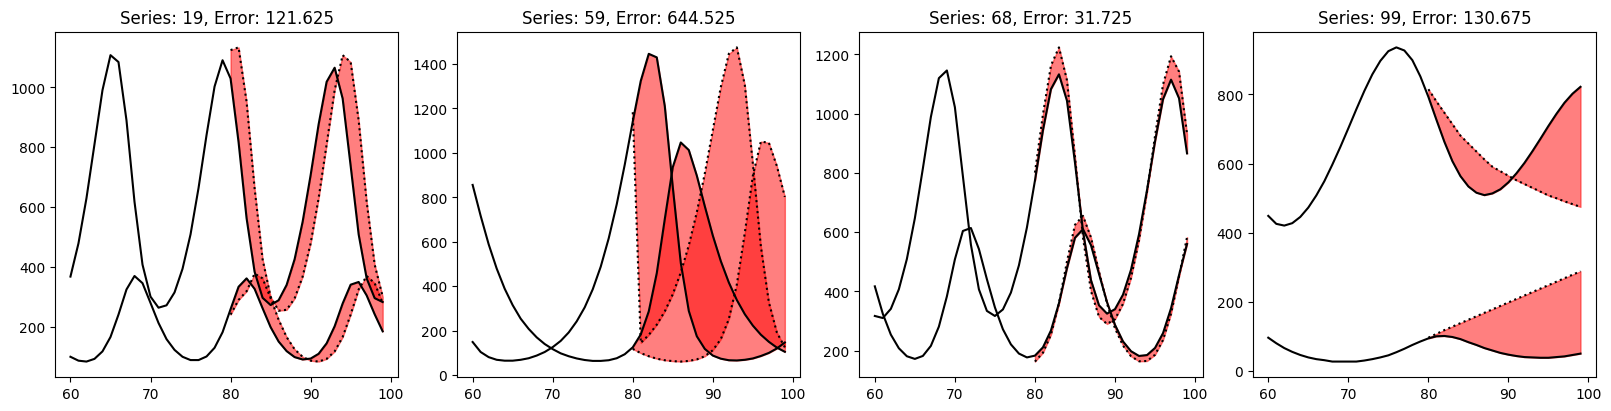

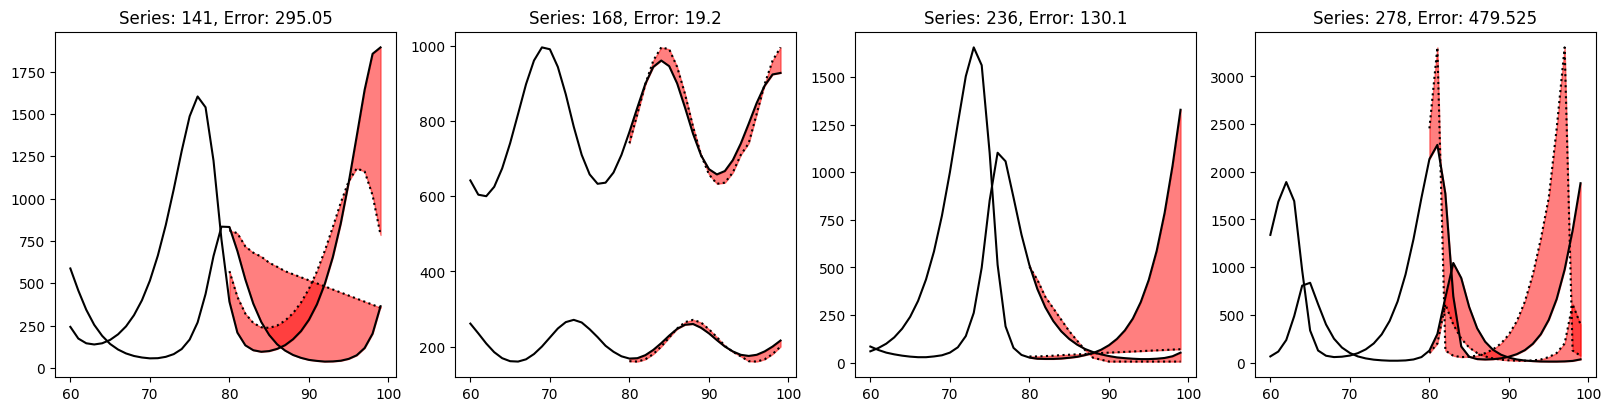

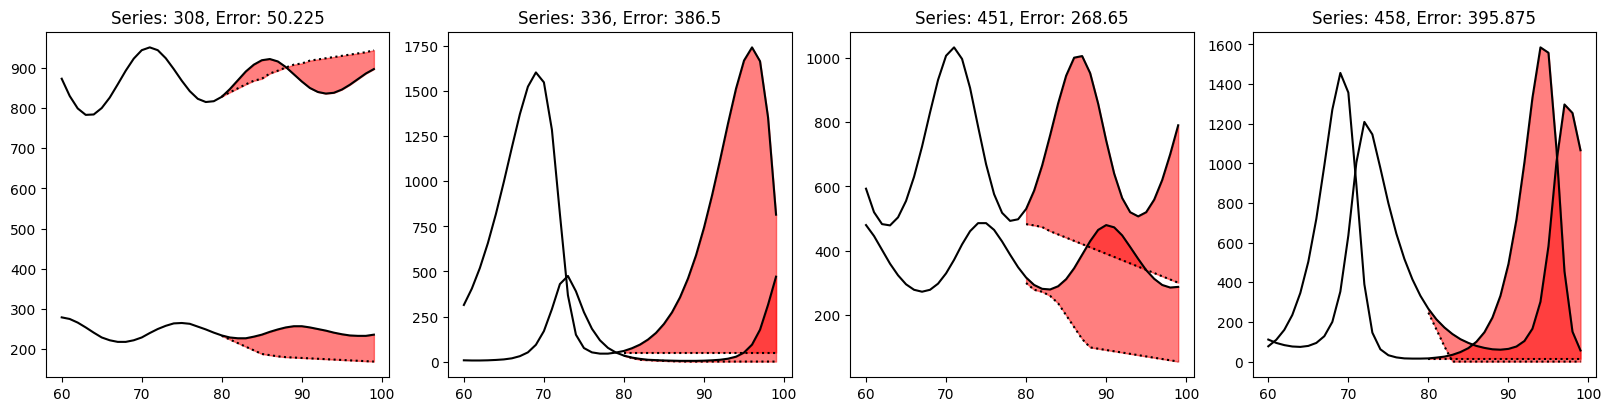

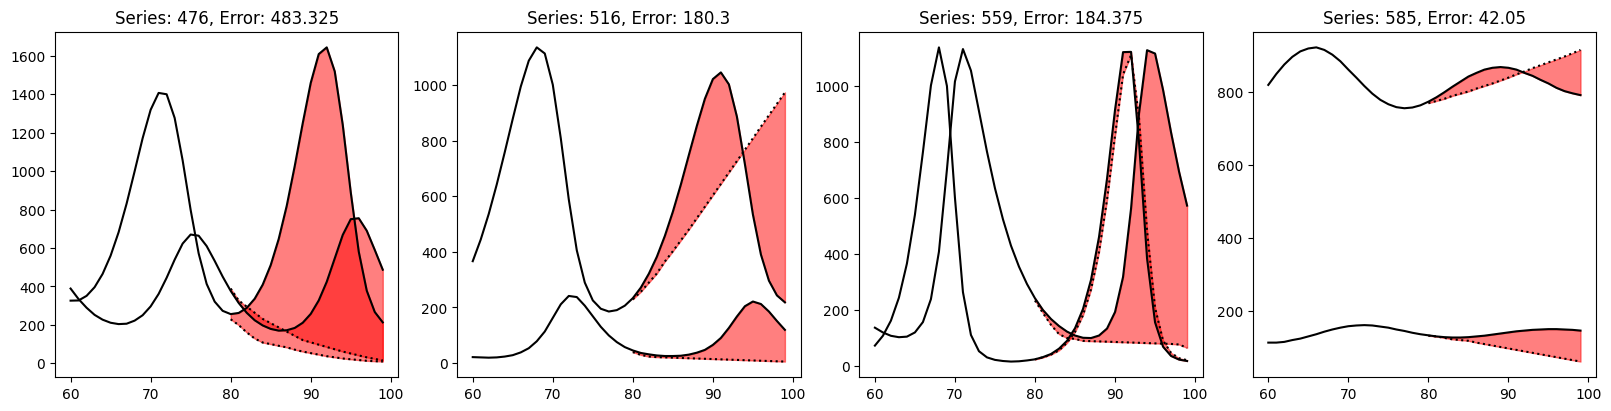

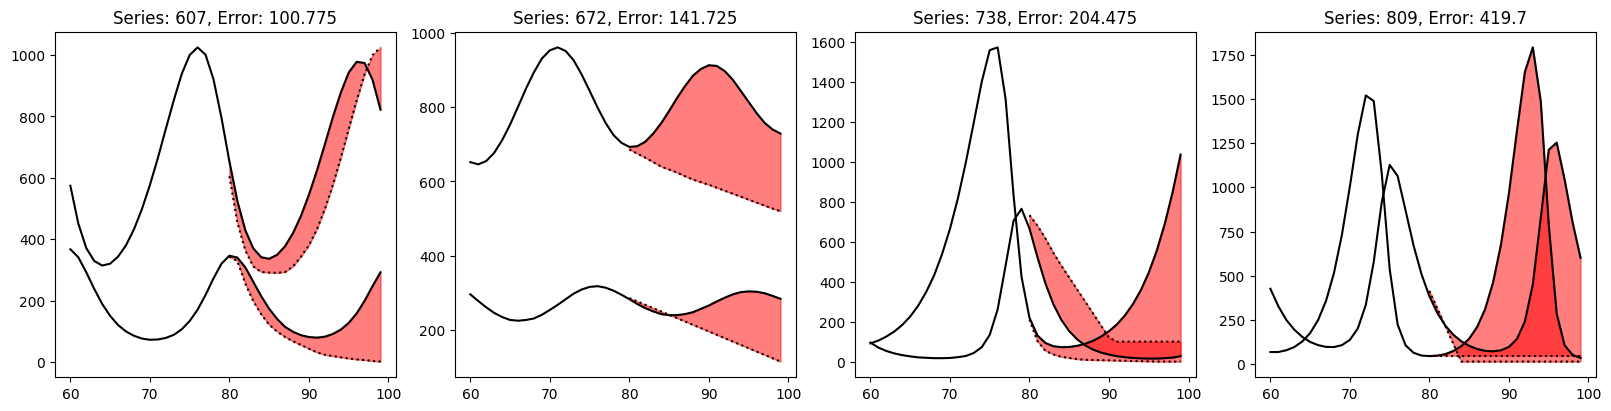

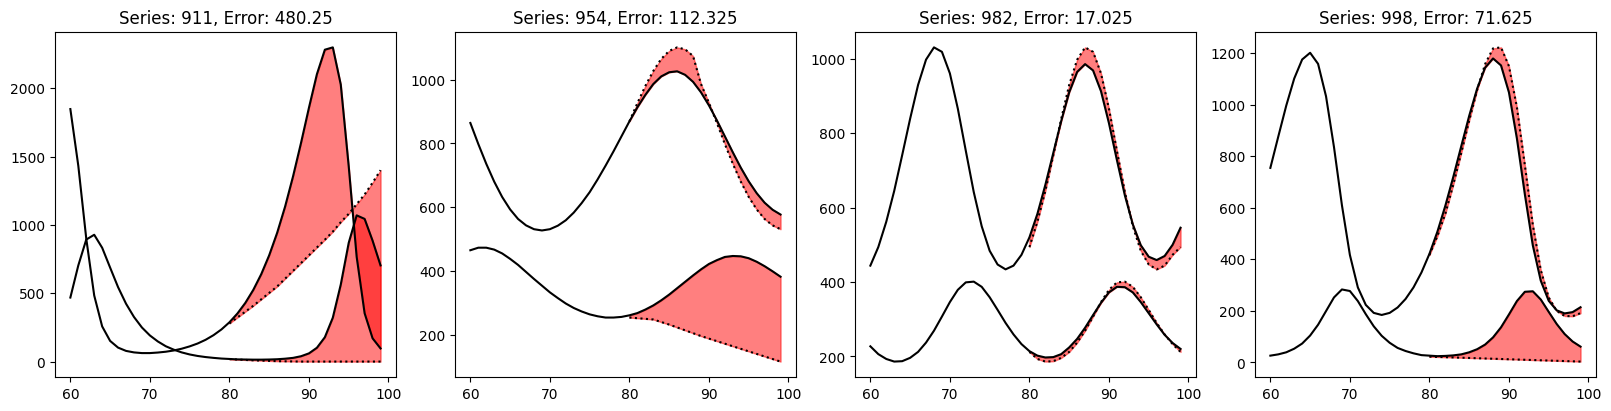

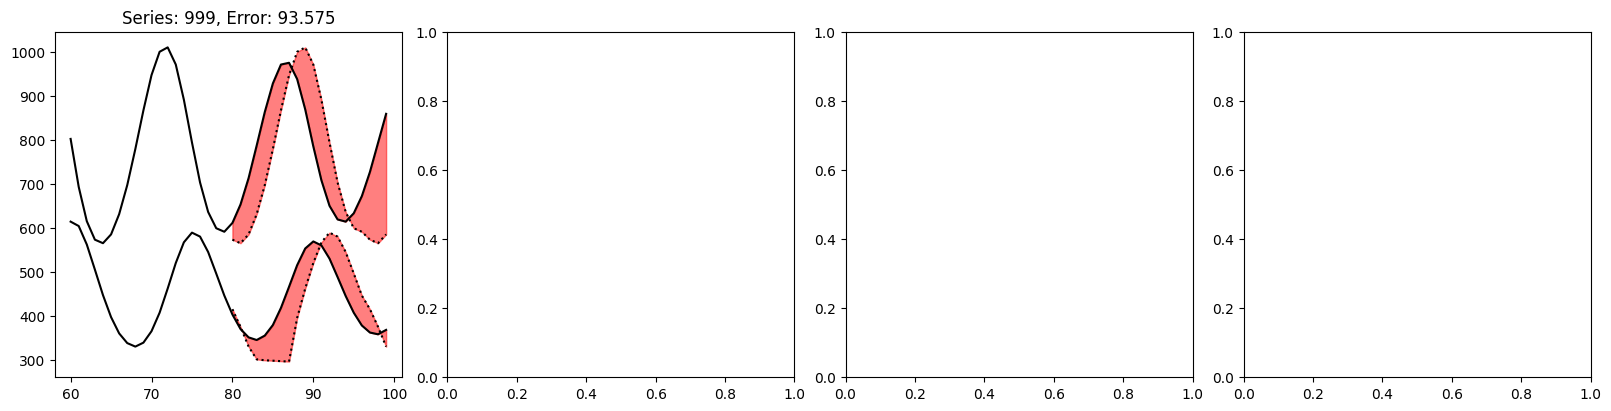


-----------------------

Experiment 3a


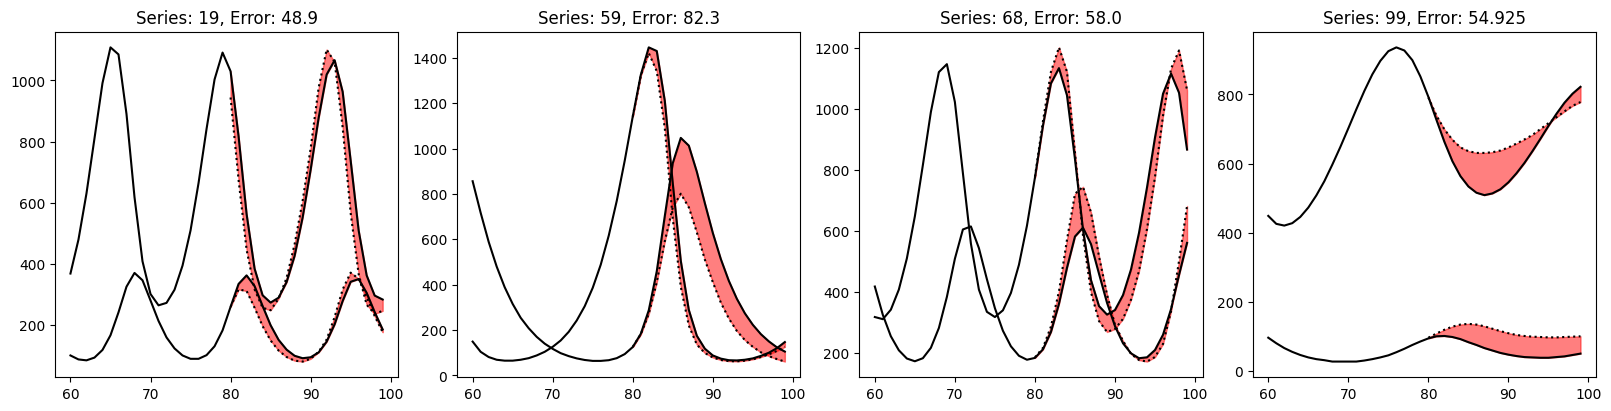

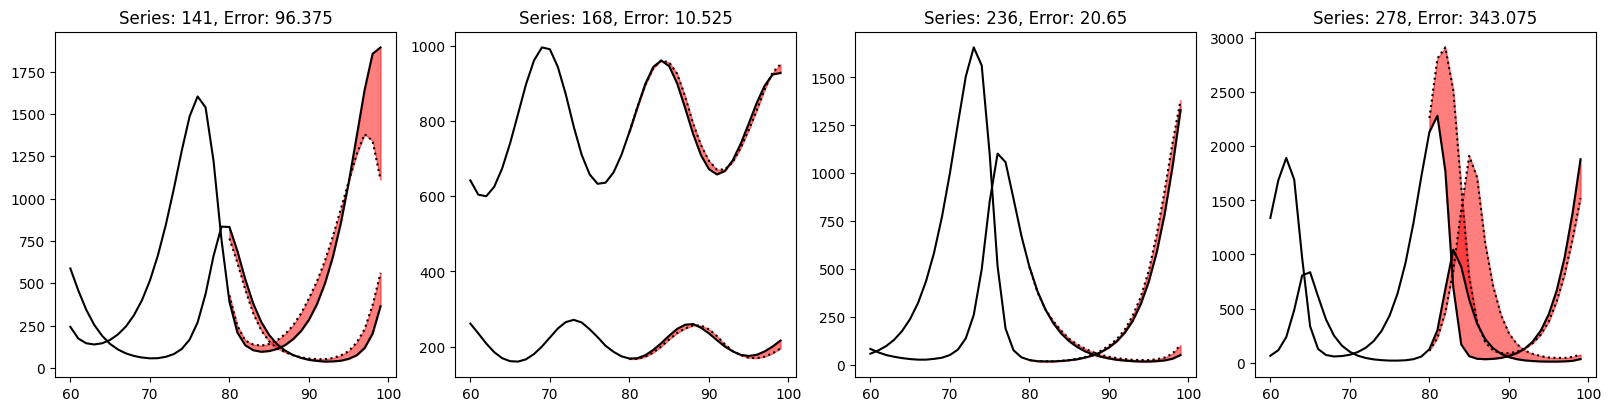

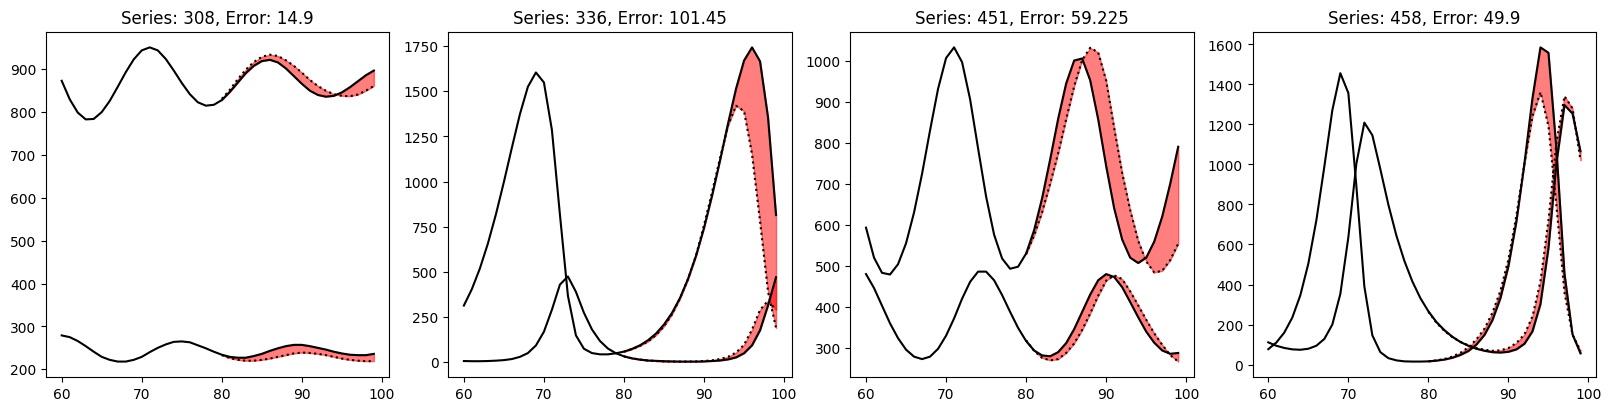

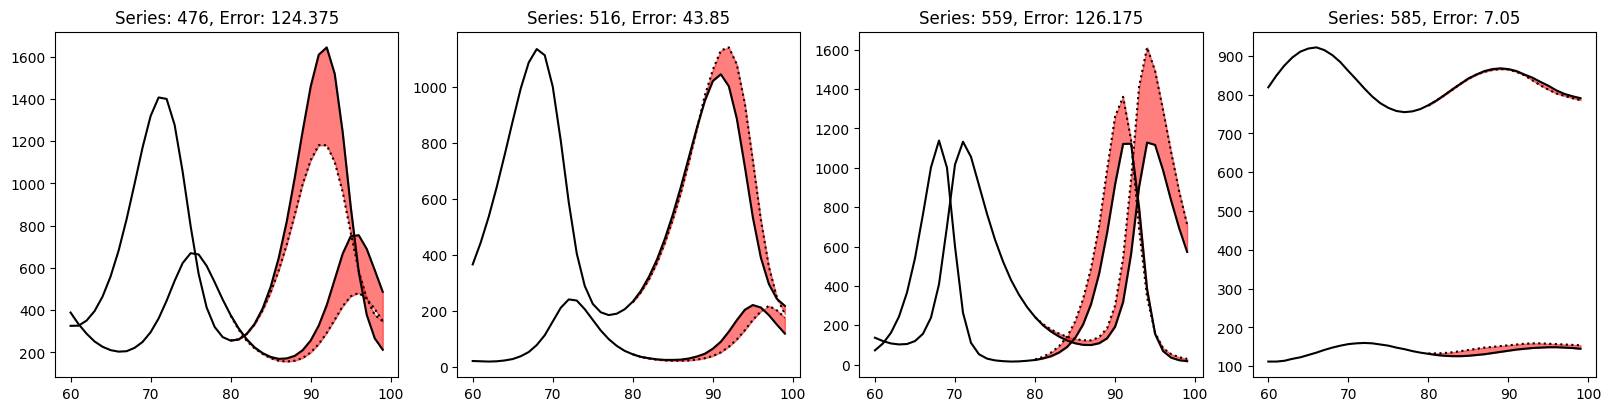

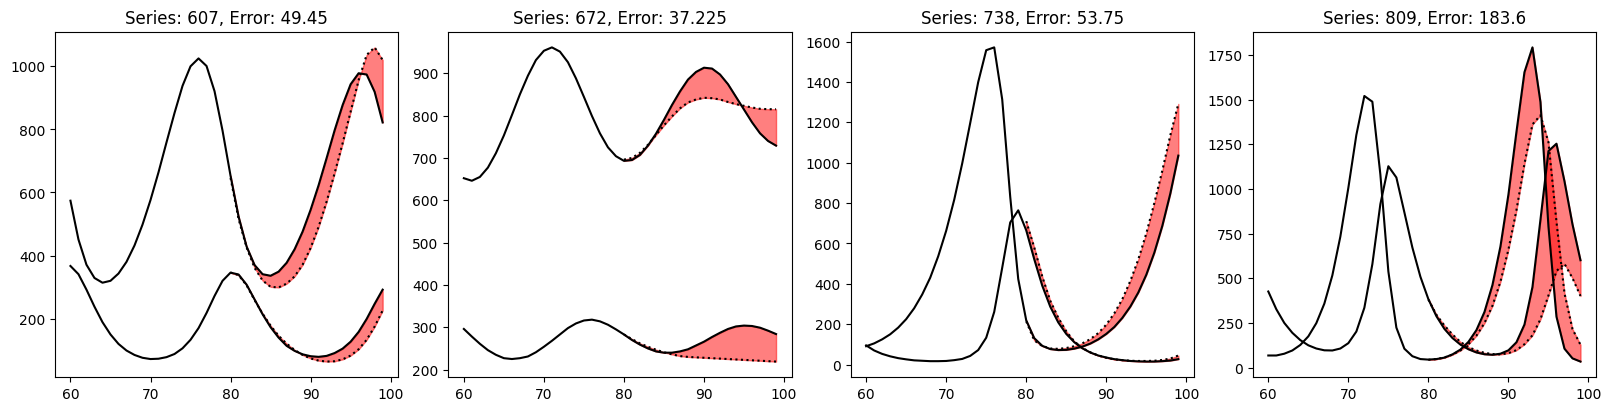

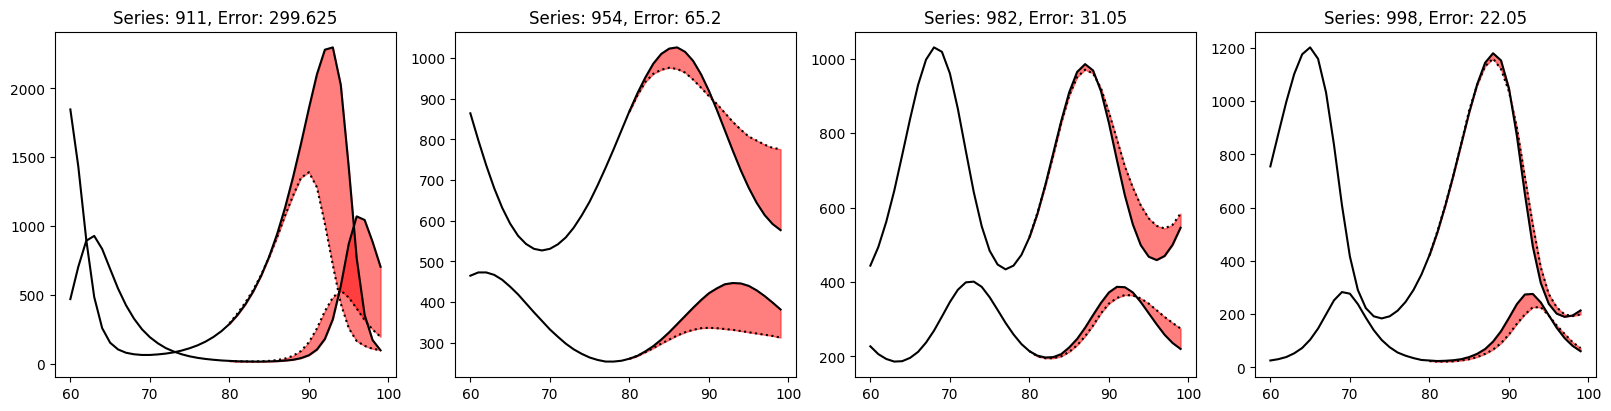

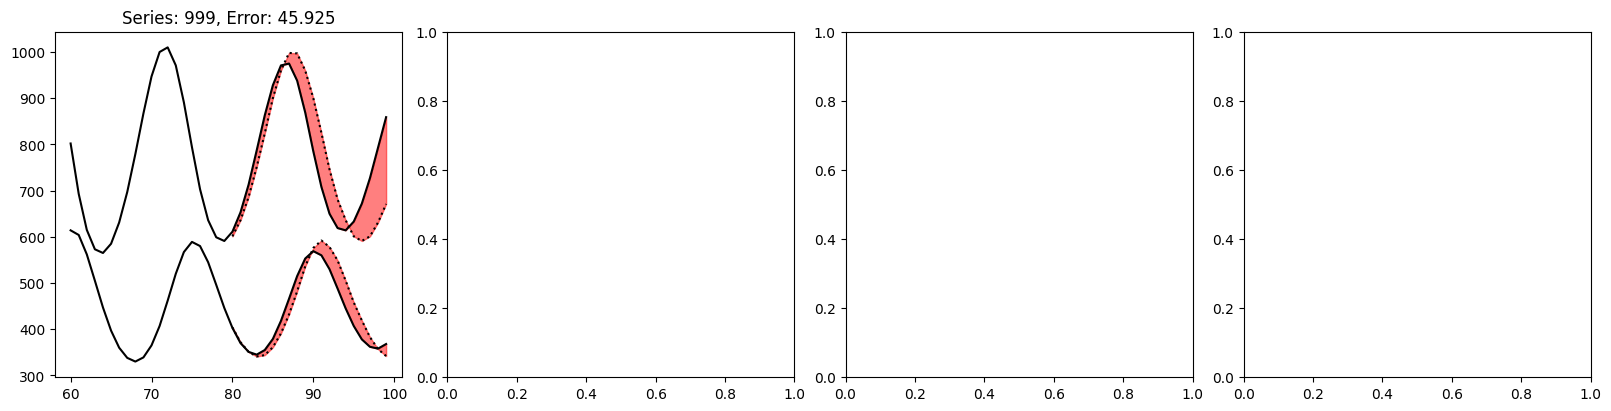

,series_id,MAE,max_dist
0,19,48.900,172.0
1,59,82.300,272.0
2,68,58.000,195.0
3,99,54.925,122.0
4,141,96.375,782.0


In [2]:
from m2_cw.inference import visualise_forecasts
from pathlib import Path
import json

figpath = Path.cwd() / "figs"
figpath.mkdir(exist_ok=True, parents=True)

figpath2 = figpath / "2"
figpath2.mkdir(parents=True, exist_ok=True)

figpath3a = figpath / "3a"
figpath3a.mkdir(parents=True, exist_ok=True)

ids_path = Path.cwd().parent.parent / "02/val_ids_subset.json"
with open(ids_path, "r") as f:
    val_ids_subset = json.load(f)

dir_contents3a = [ file for file in Path.cwd().iterdir() if "forecast" in str(file) ]
assert len(dir_contents3a) == 1
forecast3a = dir_contents3a[0]

dir_contents2 = [ file for file in ids_path.parent.iterdir() if "val_subset_forecast" in str(file) ]
assert len(dir_contents2) == 1
forecast2 = dir_contents2[0]

print("Experiment 2")
df2 = visualise_forecasts(forecast2, plots_per_row=4, eval_set="val", prefix=20, save=True, save_path=figpath2)
print("\n-----------------------\n")
print("Experiment 3a")
df3a = visualise_forecasts(forecast3a, plots_per_row=4, eval_set="val", prefix=20, save=True, save_path=figpath3a)

df3a.head()

Average MAE:
 - Expt 2: 219.41
 - Expt 3a: 81.18


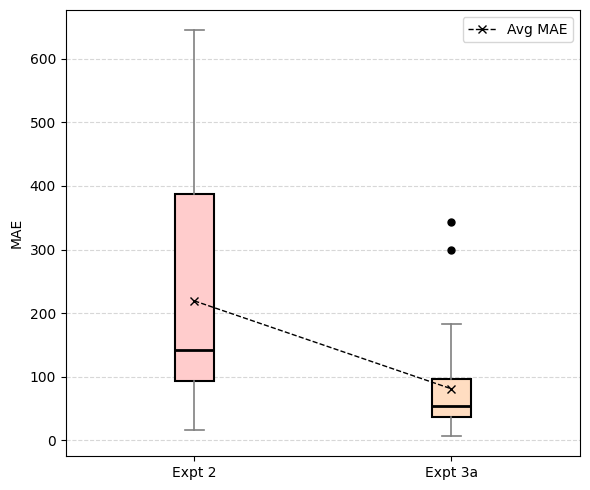

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from m2_cw.inference import boxplot_maes

ids2 = df2.series_id.to_list()
pick2 = [ idx in df3a.series_id.to_list() for idx in ids2 ]

errors3a = df3a["MAE"].to_numpy()
errors2 = df2[pick2]["MAE"].to_numpy()

data = [errors2, errors3a]
labels = ["Expt 2", "Expt 3a"]

fig, ax = boxplot_maes(data, labels)

fig.savefig(figpath / "results")
plt.show()

In [4]:
df3a_subset = df3a.nlargest(5, "MAE")
df3a_subset.head()
chosen_ids = {"all_ids": df3a_subset["series_id"].to_list()}

with open("val_ids_subsubset.json", "w") as f:
    json.dump(chosen_ids, f)